# Chapter 7 - 역행렬: 행렬 방정식의 만능 키

In [1]:
import numpy as np
import pandas as pd
import scipy.signal


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 7-3. 행렬 원소 a, b, c, d를 사용해 2*2 행렬에 대한 완전 역행렬 알고리즘 구현

In [2]:
def inverse_matrix(a, b, c, d):
    matrix = np.array([[a, b],
                       [c, d]])
    inverse = 1/(a*d - b*c) * np.array([[d, -b],
                                        [-c, a]])
    return inverse

In [3]:
# 완전 역행렬 예시 실행
inverse_matrix(1, 2, 2, 3)

array([[-3.,  2.],
       [ 2., -1.]])

In [4]:
# 원본 함수와 역행렬 알고리즘으로 만든 역행렬 곱해본다 = 단위행렬 I 나온다
np.array([[1, 2], [2, 3]]) @ inverse_matrix(1, 2, 2, 3)

array([[1., 0.],
       [0., 1.]])

## 7-4. 왼쪽 역행렬 구할 수 있었던 원리 활용하여 넓은 행렬에 대한 오른쪽 역행렬 유도

In [5]:
# 넓은 행렬 F 선언
F = np.random.randint(-10, 11, size=(3, 7))

In [6]:
def right_inverse(F):
    # 넓은 행렬 (Fat)의 오른쪽 역행렬 구한다
    # 넓은 행렬과 그 행렬의 전치를 곱한 행렬은 완전 역행렬을 가진다
    FFt = F @ F.T

    # 넓은 행렬과 그 행렬의 전치를 곱한 행렬의 완전 역행렬 FFt_inv
    FFt_inv = np.linalg.inv(FFt)
    
    # FFt_inv은 F의 역행렬이 아니다 → F.T를 왼쪽에 곱해줘야 한다
    R = F.T @ (FFt_inv)
    
    return R

In [7]:
# 오른쪽 역행렬 확인
right_inverse(F)

array([[-0.05384055, -0.03556258,  0.00469775],
       [ 0.01549428, -0.00542724, -0.06313459],
       [ 0.02256868,  0.00266652,  0.0442318 ],
       [-0.00146836, -0.02244909, -0.01373871],
       [-0.01333565,  0.01922555, -0.02997802],
       [ 0.0180937 , -0.01537188,  0.00874522],
       [-0.01649599,  0.01809417,  0.00556542]])

In [8]:
# F @ 오른쪽 역행렬 확인 == 단위행렬과 같다
np.allclose(F @ right_inverse(F), np.eye((F @ right_inverse(F)).shape[0]))

True

In [9]:
def show_fat_matrix_inverse(F):

    R = right_inverse(F)
    
    # 그래프에 사용할 데이터와 y축 레이블
    matrix_lists = [F, R, R @ F, F @ R]
    titles = ["Fat 행렬", "오른쪽 역행렬", "R @ F", "F @ R"]

    # 2*2 크기의 subplots 생성
    fig, axs = plt.subplots(2, 2, figsize=(8, 4))
    # 인덱싱을 쉽게 하기 위해, 2차원 배열을 1차원으로 변환
    axs = axs.ravel()  

    # for loop를 이용하여 각 subplot에 그래프 생성
    for i in range(len(matrix_lists)):
        im = axs[i].imshow(matrix_lists[i])
        axs[i].set_title(titles[i])
        fig.colorbar(im, ax=axs[i])  # 각 subplot에 colorbar 추가

    plt.tight_layout()
    plt.show()

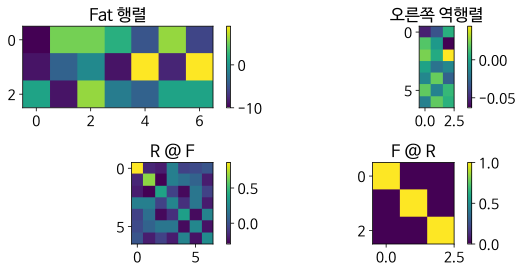

In [10]:
show_fat_matrix_inverse(F)

## 7-5. 의사 역행렬 구현
- 의사역행렬 (np.linalg.pinv를 통해)이 가역행렬의 완전 역행렬 (np.linalg.inv)와 같다는 것을 구현
- 의사역행렬이 높은 최대열계수 행렬의 경우 왼쪽 역행렬과 같고, 넓은 최대계수 행렬의 경우 오른쪽 역행렬과 같다는 것 나타내라

In [11]:
A = np.random.randint(0, 10, size=(2, 2))
A

array([[2, 2],
       [0, 2]])

In [12]:
def left_inverse(T):
    # 넓은 행렬 (Tat)의 오른쪽 역행렬 구한다
    # 넓은 행렬과 그 행렬의 전치를 곱한 행렬은 완전 역행렬을 가진다
    TtT = T.T @ T

    # 넓은 행렬과 그 행렬의 전치를 곱한 행렬의 완전 역행렬 TtT_inv
    TtT_inv = np.linalg.inv(TtT)
    
    # TtT_inv은 T의 역행렬이 아니다 → T.T를 오른쪽에 곱해줘야 한다
    T = (TtT_inv) @ T.T
    
    return T

In [13]:
def right_inverse(F):
    # 넓은 행렬 (Fat)의 오른쪽 역행렬 구한다
    # 넓은 행렬과 그 행렬의 전치를 곱한 행렬은 완전 역행렬을 가진다
    FFt = F @ F.T

    # 넓은 행렬과 그 행렬의 전치를 곱한 행렬의 완전 역행렬 FFt_inv
    FFt_inv = np.linalg.inv(FFt)
    
    # FFt_inv은 F의 역행렬이 아니다 → F.T를 왼쪽에 곱해줘야 한다
    R = F.T @ (FFt_inv)
    
    return R

In [14]:
def is_pinv_and_inv_same(matrix):
    # matrix가 정방행렬인 경우
    if matrix.shape[0] == matrix.shape[1]:
        # 역행렬
        inv = np.linalg.inv(matrix)

    # Tall 행렬의 경우
    elif matrix.shape[0] > matrix.shape[1]:
        inv = left_inverse(matrix)

    # Fat 행렬인 경우
    else:
        inv = right_inverse(matrix)
    # 의사 역행렬
    pinv = np.linalg.pinv(matrix)

    # pinv와 inv 같은지 확인
    return np.allclose(inv, pinv)

In [15]:
is_pinv_and_inv_same(A)

True

In [16]:
# Tall 행렬의 의사 역행렬 = 완전 역행렬 확인
T = np.random.randint(-10, 11, size=(7, 3))
is_pinv_and_inv_same(T)

True

In [17]:
# Fat 행렬의 의사 역행렬 = 완전 역행렬 확인
F = np.random.randint(-10, 11, size=(3, 7))
is_pinv_and_inv_same(F)

True

## 7-9. 힐버트 행렬을 사용하여 역행렬과 수치 불안정성의 위험 살펴본다
1. 힐버트 행렬 생성
2. 그림 7-5를 재현한다

In [18]:
# 힐버트 행렬 만드는 함수
def hilbert_matrix(shape_num):

    # shape_num 만큼 (정방행렬) 의 영행렬 만들어준다
    hilbert = np.zeros(shape=(shape_num, shape_num))

    # 이중 for 문 활용하여 hilbert 행렬의 인덱스에 해당하는 값을 채워준다
    for i in np.arange(shape_num):
        for j in np.arange(shape_num):
            hilbert[i][j] = 1 / ((i+1) + (j+1) -1)
    
    return hilbert

In [19]:
hilbert_matrix(5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

In [20]:
def show_hilbert(shape_num):

    hilbert = hilbert_matrix(shape_num)
    hilbert_inv = np.linalg.inv(hilbert)
    hilbert_dot = hilbert @ hilbert_inv


    # 그래프에 사용할 데이터와 y축 레이블
    matrix_lists = [hilbert, hilbert_inv, hilbert_dot]
    titles = ["힐버트 행렬", "힐버트 역행렬", "힐버트 행렬과 역행렬의 곱"]

    # 2*2 크기의 subplots 생성
    fig, axs = plt.subplots(1, 3, figsize=(8, 4))
    # 인덱싱을 쉽게 하기 위해, 2차원 배열을 1차원으로 변환
    axs = axs.ravel()  

    # for loop를 이용하여 각 subplot에 그래프 생성
    for i in range(len(matrix_lists)):
        im = axs[i].imshow(matrix_lists[i])
        axs[i].set_title(titles[i])
        # fig.colorbar(im, ax=axs[i])  # 각 subplot에 colorbar 추가

    plt.tight_layout()
    plt.show()

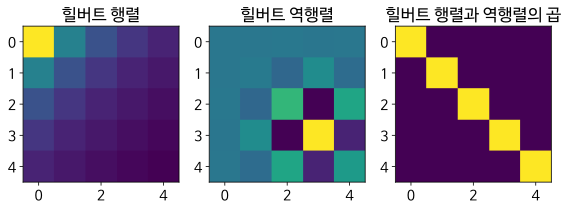

In [21]:
show_hilbert(5)

## 7-10. 힐버트 행렬 만든 다음, np.linalg.inv 사용하여 역을 계산하고 두 행렬의 곱 (product) 계산
- 이 곱은 단위 행렬과 일치해야 한다

In [22]:
def show_hilbert_diff_and_cond(start_num, end_num):

    euclidean_list = []
    euclidean_gauss_list = []

    cond_list = []
    cond_gauss_list = []

    for i in np.arange(start_num, end_num):
        # 힐버트 행렬 생성
        hilbert = hilbert_matrix(i)
        hilbert_inv = np.linalg.inv(hilbert)
        hilbert_dot = hilbert @ hilbert_inv
        
        # 가우스 행렬 생성
        gauss = np.random.randn(i, i)
        gauss_inv = np.linalg.inv(gauss)
        gauss_dot = gauss @ gauss_inv

        # hilbert_dot과 np.eye(i)의 차이를 구한 후 norm 계산
        euclidean = np.linalg.norm(hilbert_dot - np.eye(i))
        euclidean_list.append(euclidean)

        # gauss_dot과 np.eye(i)의 차이를 구한 후 norm 계산
        euclidean_gauss = np.linalg.norm(gauss_dot - np.eye(i))
        euclidean_gauss_list.append(euclidean_gauss)

        # 조건 수 계산하여 cond_list에 추가
        cond_list.append(np.linalg.cond(hilbert))
        cond_gauss_list.append(np.linalg.cond(gauss))
    

    matrix_lists = [euclidean_list, euclidean_gauss_list, cond_list, cond_gauss_list]
    title_lists = ["단위 행렬까지의 거리", "행렬 조건수"]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # for loop을 통해 그래프 생성
    for i, ax in enumerate(axs):
        # i=0이면, 단위 행렬까지의 거리
        if i == 0:
            ax.plot(np.arange(start_num, end_num), 
                    np.log(matrix_lists[0]), 
                    marker="s", color="r", markersize=3, label="힐버트")
            ax.plot(np.arange(start_num, end_num), 
                    np.log(matrix_lists[1]), 
                    marker="s", color="b", markersize=3, label="난수")
            ax.set_title(title_lists[i])
            ax.set_ylabel("유클리드 거리 로그")  # 첫 번째 그래프의 y축 레이블 설정
            ax.legend()

        # i=1이면, 행렬 조건수
        elif i == 1:
            ax.plot(np.arange(start_num, end_num), 
                    np.log(matrix_lists[2]), 
                    marker="s", color="r", markersize=3, label="힐버트")
            ax.plot(np.arange(start_num, end_num), 
                    np.log(matrix_lists[3]), 
                    marker="s", color="b", markersize=3, label="난수")
            ax.set_title(title_lists[i])
            ax.set_ylabel("로그 척도")
            ax.legend()
    
    plt.tight_layout()
    plt.show()

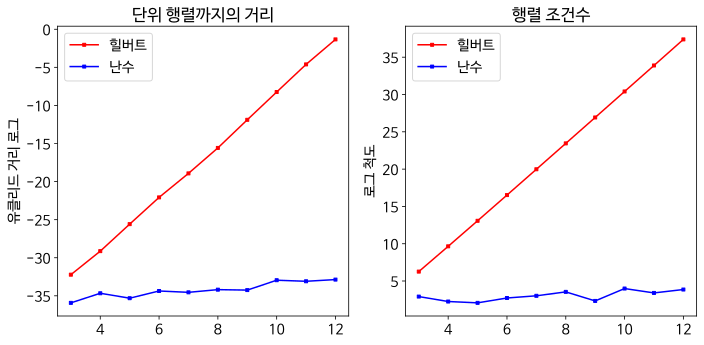

In [23]:
show_hilbert_diff_and_cond(3, 13)